In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import skeletonize
from skimage import data
import sknw
import networkx as nx


In [3]:
# zig zag definitions
def drawline(p1,p2,image):
    p1 = tuple(p1.astype(int).tolist()) #input is numpyfloat array
    p2 = tuple(p2.astype(int).tolist()) # cv2.line needs tuple int inputs 
    color = (255, 255, 255) # color in BGR
    thickness = 1 # line thickness  

    #AND THEN FLIP THE  Y , X  FORMAT TO GRAPH IT CORRECTLY !!!!!! 
    start_point  = [p1[1],p1[0]]
    end_point = [p2[1],p2[0]]

    return(cv2.line(image, start_point, end_point, color, thickness))

def open_image(path):
    try: 
        image = cv2.imread(path, 0) # Reading an image in grayscale mode
        print("found image at : " , path)
    except:
        print("couldn't find image at : ", path)
    return(image)

def show_image(image):
    plt.imshow(image, cmap='gray') #map the image to black and white, white representing the line 
    plt.show()
    print("Plotted")

def zigzag(start_point,end_point,num_turns,zig_zag_size,image): #zigzagsize will scale the size of the zig zags
    
    #num turns must be greater than 2 
    slope_vector = np.array([  end_point[0]- start_point[0] , end_point[1] - start_point[1] ]) # vector representation of slope here in format [y , x]
    step_vector = slope_vector / (num_turns - 1) # partition total change inslope into steps to zig zag across and -1 because the number of turns will be one less than the number of partitions (also in format [y , x])
    normalized_step_vector = step_vector/np.linalg.norm(step_vector) # here we are getting the normalized step_vector so we can use its direction and ignore its magnitude 
    zig_zag_size_vector = normalized_step_vector * zig_zag_size

    for i in range(0,num_turns): 
        

        # ctrl / to toggle commented areas 
        # if i%2 ==0: # set zig and zag values (with alternating directions)
        #     zigzag = zig_zag_size_vector * np.array([1,-1])
        # else:
        #     zigzag =  zig_zag_size_vector * np.array([-1,1])

        if i%2 ==0: # set zig and zag values (with alternating directions)
            zigzag = [-zig_zag_size_vector[1], zig_zag_size_vector[0]]
        else:
            zigzag = [zig_zag_size_vector[1], -zig_zag_size_vector[0]]

        if i == 0: #if i is start point
            pt1 = start_point + step_vector*(i)
            pt2 = start_point + step_vector*(i+1) + zigzag
            try : image = drawline(pt1,pt2,image)
            except : print("error zigging")
            pt_old = pt2 #save endpoint
        elif i == num_turns-1: #elif i+1 is FINAL endpoint
            pt1 = pt_old
            pt2 = start_point + step_vector*(i) 
            try : image = drawline(pt1,pt2,image)
            except : print("error zagging")
        else: #otherwise in the middle 
            pt1 = pt_old
            pt2 = start_point + step_vector*(i+1) +zigzag
            try : image = drawline(pt1,pt2,image)
            except : print("error zig-zagging")
            pt_old =pt2 #save endpoint for next start  
    #image = drawline(start_point,end_point,image) #this is just for error checking, draw a line between start and end points 
    #show_image(image)
    return(image)

In [4]:
#skeleton to graph definition

def skeleton_to_graph(path):
    try: img = cv2.imread(cv2.samples.findFile(path),0) # get img
    except : print("can't find that image at", path)
    img = (255-img)
    img = img > 127 #make bool 
    ske = skeletonize(~img).astype(np.uint16) # use sknw skeletonize 
    graph = sknw.build_sknw(ske) # build graph from skeleton
    print("\nskeleton converted to graph\n")
    return graph


In [5]:

# start HERE : to do : 

# first:fix the zig zag function as its not ziggin and zaggin right 

# then: iterate over the whole damn image

# then: make the zig zag proportional to shiz weights 

# then make it so that it prints to a seperate image 

# then convert to coordinates for gps

# then vroom 


skeleton converted to graph

found image at :  ../Lake_Murray_Map_Skeletons/SE_corner_medial_axis.png


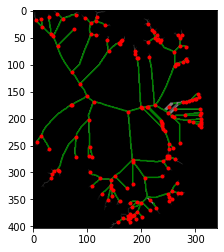

In [6]:
path = r'../Lake_Murray_Map_Skeletons/SE_corner_medial_axis.png' 
graph = skeleton_to_graph(path)
image = open_image(path) #start by opening the image, choose image in the function 

# draw image
plt.imshow(image, cmap='gray')

for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')

# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.') # ps[0,1], ps[0,0] = x , y coordinates
plt.savefig('skel_network_and_nodes.png')



skeleton converted to graph

found image at :  ../Lake_Murray_Map_Skeletons/SE_corner_medial_axis.png
11 [50, 11]
26 [66, 11]
32 [31, 28]
8 [115, 16]
12 [101, 18]
33 [45, 32]
13 [16, 23]
12 [10, 24]
9 [110, 22]
18 [124, 22]
21 [104, 35]
16 [26, 39]
32 [60, 50]
4 [221, 38]
10 [224, 45]
5 [35, 46]
10 [112, 45]
71 [92, 80]
6 [274, 48]
4 [227, 48]
6 [270, 49]
19 [41, 57]
12 [218, 55]
5 [228, 53]
16 [272, 58]
3 [229, 54]
6 [232, 56]
19 [137, 65]
3 [235, 57]
5 [160, 59]
29 [247, 70]
19 [148, 66]
3 [161, 62]
50 [54, 90]
12 [278, 65]
12 [266, 71]
3 [139, 75]
61 [116, 106]
7 [189, 78]
23 [262, 89]
89 [221, 131]
3 [193, 89]
91 [197, 135]
6 [280, 92]
7 [280, 95]
9 [272, 96]
3 [269, 98]
4 [266, 100]
3 [263, 102]
3 [262, 103]
72 [247, 139]
22 [79, 125]
23 [95, 148]
12 [299, 158]
28 [85, 167]
14 [105, 164]
7 [303, 162]
3 [297, 166]
5 [293, 168]
3 [297, 166]
3 [299, 165]
3 [289, 168]
6 [284, 168]
65 [145, 178]
33 [105, 187]
3 [279, 170]
3 [282, 169]
4 [272, 172]
3 [271, 173]
5 [261, 172]
3 [252, 190

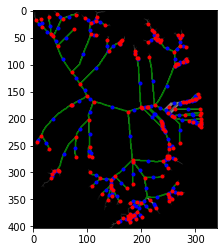

In [16]:
#FIND MIDPOINT
path = r'../Lake_Murray_Map_Skeletons/SE_corner_medial_axis.png' 
graph = skeleton_to_graph(path)
image = open_image(path) #start by opening the image, choose image in the function 

# draw image
plt.imshow(image, cmap='gray')

for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')

#  ----------------------------------get and plot mid point here 
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    
    #print(len(ps))
    if len(ps)%2 == 0:
        midpoint = [ ps[int(len(ps)/2),1] , ps[int(len(ps)/2),0] ]
        #print(int(len(ps)/2))
    else:
        midpoint = [ ps[int((len(ps)+1) /2),1] , ps[int((len(ps)+1) /2),0] ]
        #print(int((len(ps)+1) /2))
    print(len(ps),midpoint)
    plt.plot(midpoint[0], midpoint[1], 'b.')

#------------------------------------- finished

# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.') # ps[0,1], ps[0,0] = x , y coordinates
plt.savefig('skel_network_and_nodes.png')


In [ ]:
# maybe add clause - if weight < 10 && endpoints != nodes: ignore